Weather Forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. People have attempted to predict the weather informally for millennia and formally since the 19th century. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere, land, and ocean and using meteorology to project how the atmosphere will change at a given place.

Once calculated manually based mainly upon changes in barometric pressure, current weather conditions, and sky condition or cloud cover, weather forecasting now relies on computer-based models that take many atmospheric factors into account.[1] Human input is still required to pick the best possible forecast model to base the forecast upon, which involves pattern recognition skills, teleconnections, knowledge of model performance, and knowledge of model biases. The inaccuracy of forecasting is due to the chaotic nature of the atmosphere, the massive computational power required to solve the equations that describe the atmosphere, the land, and the ocean, the error involved in measuring the initial conditions, and an incomplete understanding of atmospheric and related processes. Hence, forecasts become less accurate as the difference between current time and the time for which the forecast is being made (the range of the forecast) increases. The use of ensembles and model consensus help narrow the error and provide confidence level in the forecast.

There is a vast variety of end uses to weather forecasts. Weather warnings are important forecasts because they are used to protect life and property. Forecasts based on temperature and precipitation are important to agriculture, and therefore to traders within commodity markets. Temperature forecasts are used by utility companies to estimate demand over coming days. On an everyday basis, many use weather forecasts to determine what to wear on a given day. Since outdoor activities are severely curtailed by heavy rain, snow and wind chill, forecasts can be used to plan activities around these events, and to plan ahead and survive them.

DATA DESCRIPTION

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia..

Problem Statement:
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
#Loading the Dataset
import pandas as pd
import numpy as np

df=pd.read_csv('Rainfalldata.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [3]:
df.tail().T

,8420,8421,8422,8423,8424
Date,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25
Location,Uluru,Uluru,Uluru,Uluru,Uluru
MinTemp,2.8,3.6,5.4,7.8,14.9
MaxTemp,23.4,25.3,26.9,27.0,NaN
Rainfall,0.0,0.0,0.0,0.0,0.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,E,NNW,N,SE,NaN
WindGustSpeed,31.0,22.0,37.0,28.0,NaN
WindDir9am,SE,SE,SE,SSE,ESE


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Details About the Columns


Number of columns: 23 Number of Rows: 8425

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [5]:
#Data Exploration
cat_cols=df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------------------------------------------')

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
--------------------------------------------------------------------------
Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
--------------------------------------------------------------------------
WindGustDir
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
--------------------------------------------------------------------------
WindDir9am
N      906
SW     704
NW     625
W

In [6]:
categorical_fetaures=[]
continous_features=[]
for col in df.columns:
    if df[col].dtype=='object':
        categorical_fetaures.append(col)
    else:
        continous_features.append(col)   

for f in continous_features:
    print(f)
    print("===============================")
    print(df[f].value_counts())

MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64
Evaporation
4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64
Sunshine
0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64
WindGustSpeed
39.0     441
35.0     435
37.0     422
33.0     408
31.0  

In [7]:
# Dropping the  irrelevant columns..


df['date']=pd.to_datetime(df['Date']).dt.day
df['month']=pd.to_datetime(df['Date']).dt.month
df['year']=pd.to_datetime(df['Date']).dt.year


df.drop(['Date'],axis=1,inplace=True)

# Checking for the Columns containing Null , Blank Or Empty Values


In [8]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
date                0
month               0
year                0
dtype: int64

In [9]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
date               int64
month              int64
year               int64
dtype: object

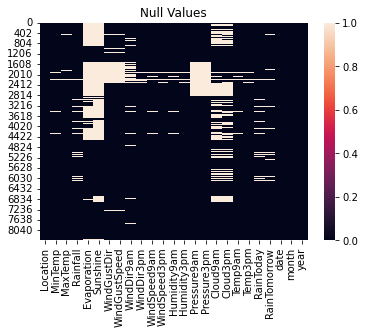

In [10]:
#Checking the presence of NULL BLANK or EMPTY VALUES through HeatMap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [11]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [12]:
#let us fill the numerical missing values with median value.
df.fillna(df.median(),inplace=True)

#replacing all the categorical values null values with most_frequent value in the attribute
df['WindGustDir'].replace({np.nan:'N'},inplace=True)
df['WindDir9am'].replace({np.nan:'N'},inplace=True)
df['WindDir3pm'].replace({np.nan:'SE'}, inplace=True) 
df['RainToday'].replace({np.nan:0}, inplace=True)
df['RainTomorrow'].replace({np.nan:0}, inplace=True)

C:\Users\Admin\AppData\Local\Temp/ipykernel_1020/1076058397.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


In [13]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
date             0
month            0
year             0
dtype: int64

In [14]:
#Checking and Transforming the Data types of the Columns To Same DataTypes for Better Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [15]:
df.describe(include=['O'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,8425,8425,8425,8425
unique,12,16,16,16,3,3
top,Melbourne,N,N,SE,No,No
freq,1622,1704,1735,1121,6195,6195


In [16]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for val in list1:
  df[val]=le.fit_transform(df[val].astype(str))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


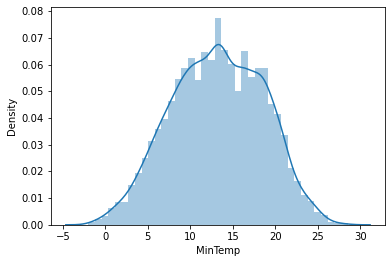

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


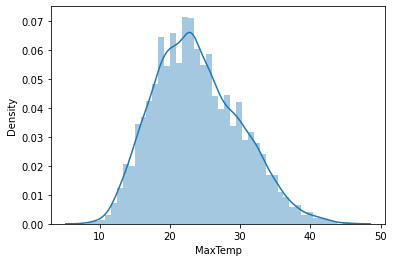

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


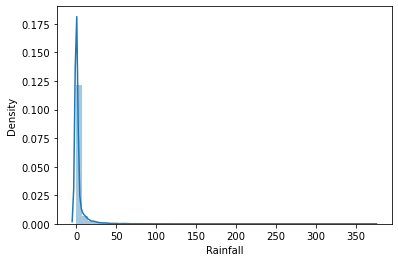

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


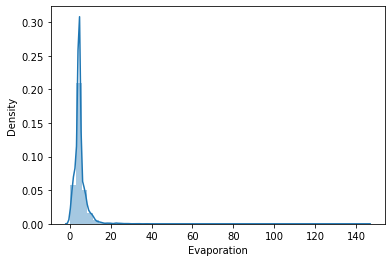

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


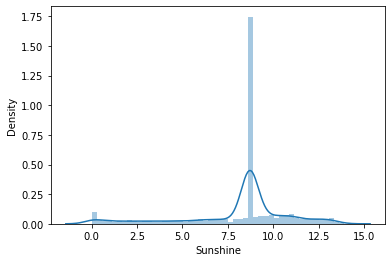

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


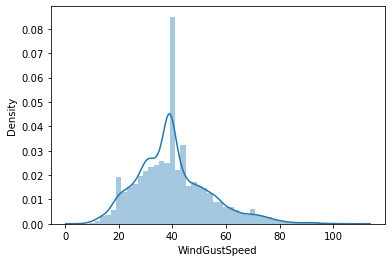

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


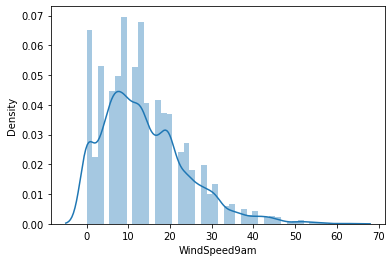

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


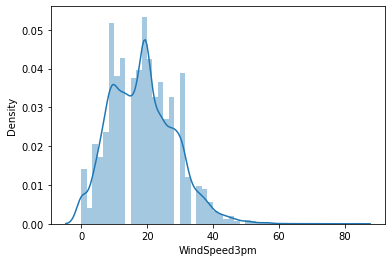

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


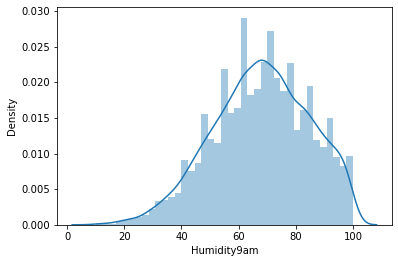

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


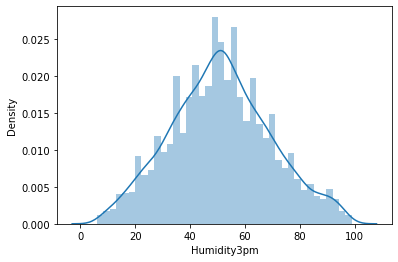

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


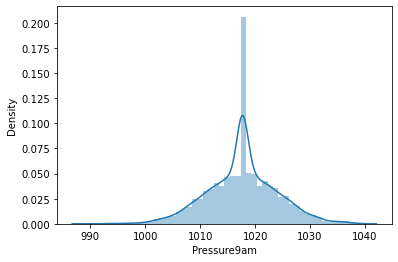

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


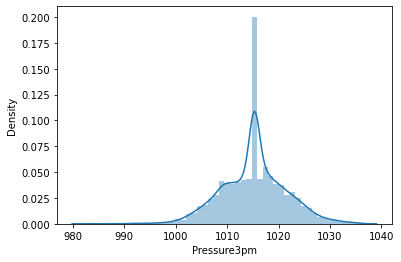

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


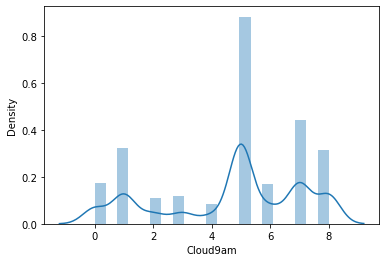

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


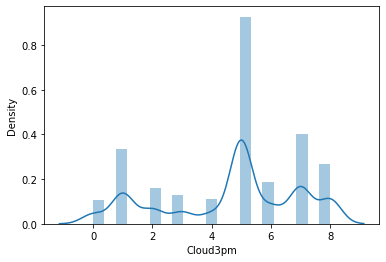

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


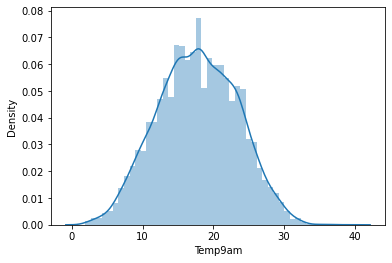

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


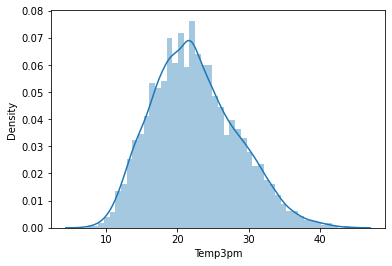

In [18]:
#Explotary Data Analysis
for col in continous_features:
    sns.distplot(df[col])
    plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


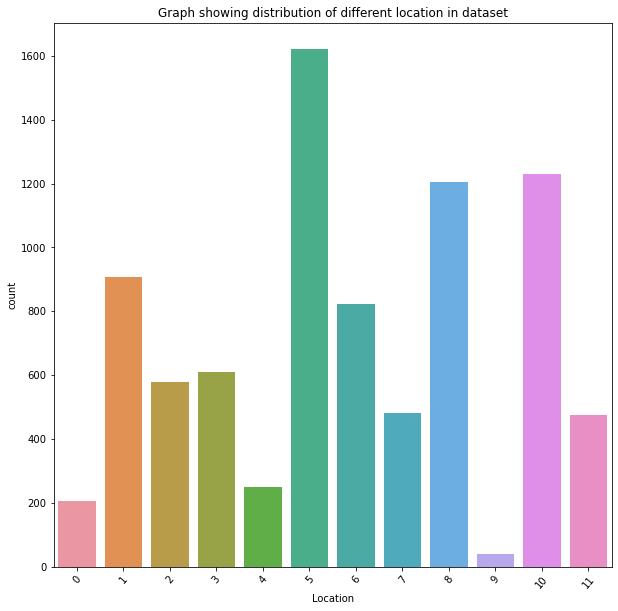

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10), facecolor='white')
sns.countplot(df['Location'])
plt.title('Graph showing distribution of different location in dataset')
plt.xticks(rotation=50)
plt.show()

its clear that melbourne has the highest no of rains

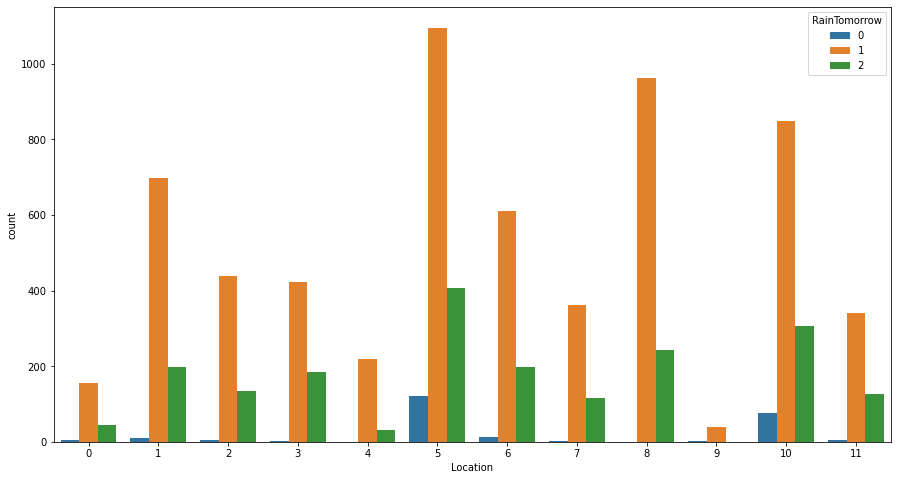

In [20]:
plt.figure(figsize=(15,8), facecolor='white')
sns.countplot(x='Location',hue='RainTomorrow',data=df)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


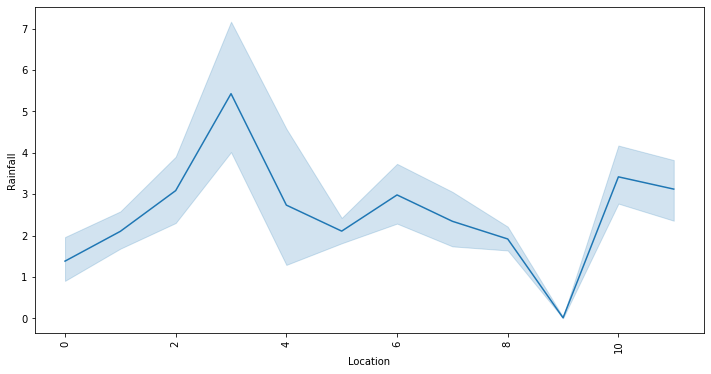

In [21]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.lineplot(df['Location'],df['Rainfall'])
plt.show()

Text(0.5, 1.0, 'Distribution of Minimum temperature')

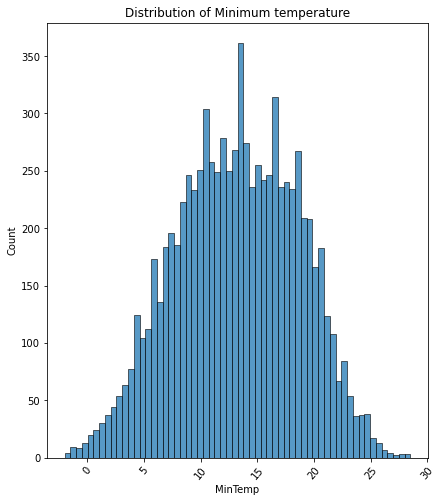

In [22]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(df['MinTemp'],bins=60)
plt.xticks(rotation=50)
plt.title('Distribution of Minimum temperature')

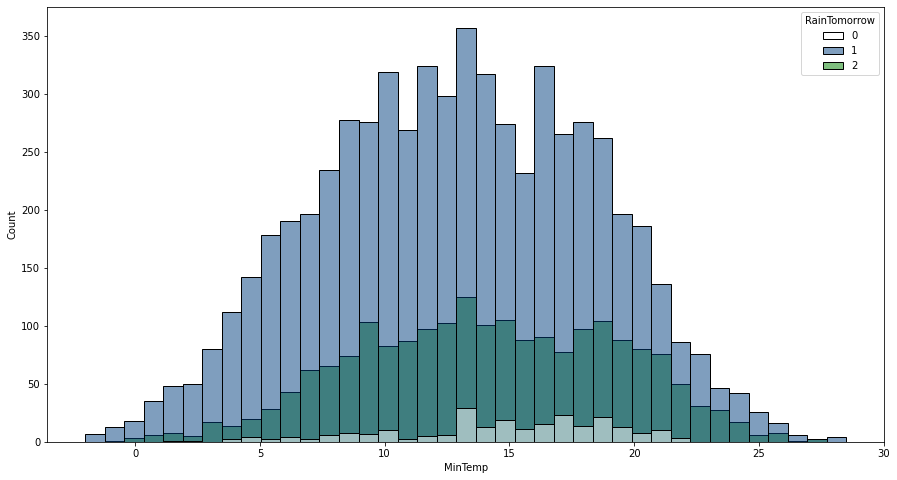

In [23]:
plt.figure(figsize=(15,8), facecolor='white')
sns.histplot(x='MinTemp',hue='RainTomorrow',data=df, palette='ocean_r')

plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


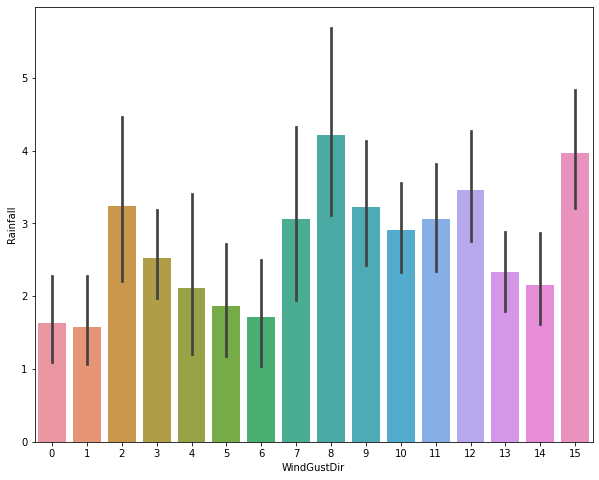

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(df['WindGustDir'],df['Rainfall'])
plt.show()

From the above plot we can observe that, when the WindGust direction is South, the rainfall level is high.


When the Wind gust direction is North, then the rainfall level is low.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


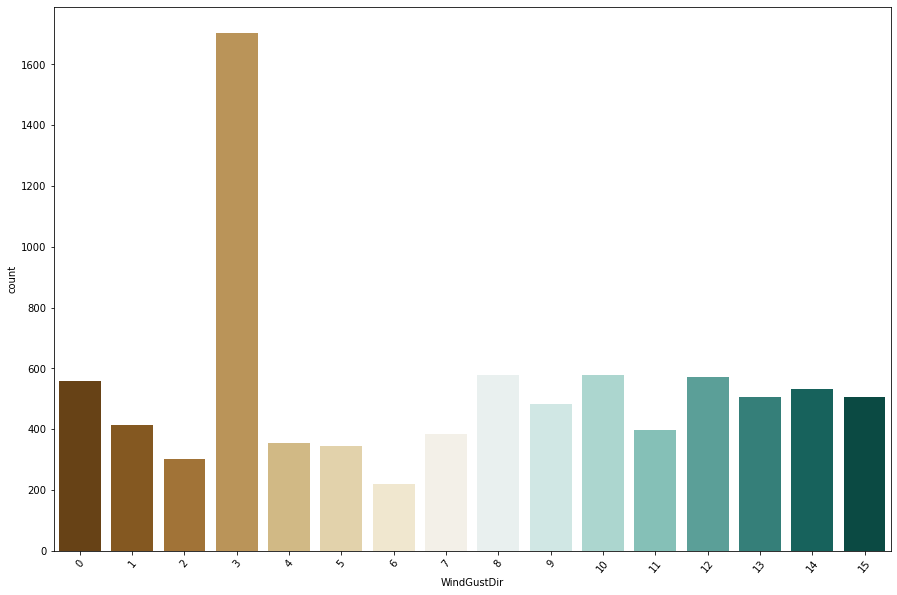

In [28]:
plt.figure(figsize=(15,10), facecolor='white')
sns.countplot(df['WindGustDir'],palette='BrBG')
plt.xticks(rotation=50)
plt.show()

The direction of wind gust is towords north the highest times

From the above plot we can see that, highest speed of WindGust is 107 and lowest speed is 7.

Most of the times, WindGust speed is at the range of 39. WindGust speed 107 is very rare..

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


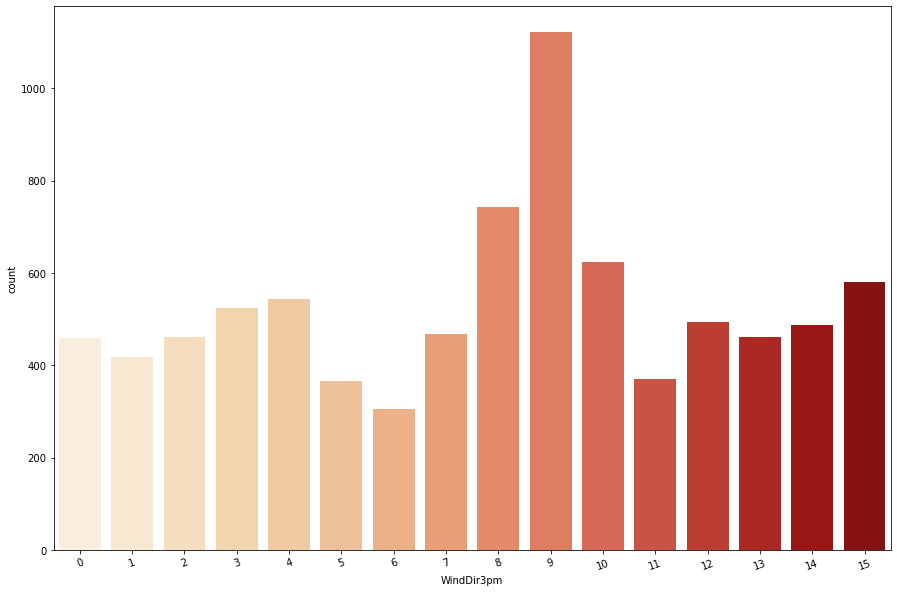

In [30]:
plt.figure(figsize=(15,10), facecolor='white')
sns.countplot(df['WindDir3pm'],palette='OrRd')
plt.xticks(rotation=20)
plt.show()

On an average Wind Direction at 3 pm is 300 hrs over the period and Wind Direction at 9am 250 hrs.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '6.0'),
  Text(4, 0, '7.0'),
  Text(5, 0, '9.0'),
  Text(6, 0, '11.0'),
  Text(7, 0, '13.0'),
  Text(8, 0, '15.0'),
  Text(9, 0, '17.0'),
  Text(10, 0, '19.0'),
  Text(11, 0, '20.0'),
  Text(12, 0, '22.0'),
  Text(13, 0, '24.0'),
  Text(14, 0, '26.0'),
  Text(15, 0, '28.0'),
  Text(16, 0, '30.0'),
  Text(17, 0, '31.0'),
  Text(18, 0, '33.0'),
  Text(19, 0, '35.0'),
  Text(20, 0, '37.0'),
  Text(21, 0, '39.0'),
  Text(22, 0, '41.0'),
  Text(23, 0, '43.0'),
  Text(24, 0, '44.0'),
  Text(25, 0, '46.0'),
  Text(26, 0, '48.0'),
  Text(27, 0, '50.0'),
  Text(28, 0, '52.0'),
  Text(29, 0, '54.0'),
  Text(30, 0, '56.0'),
  Text(31, 0, '57.0'),
  Text(32, 0, '61.0'),
  Text(33, 0, '63.0')])

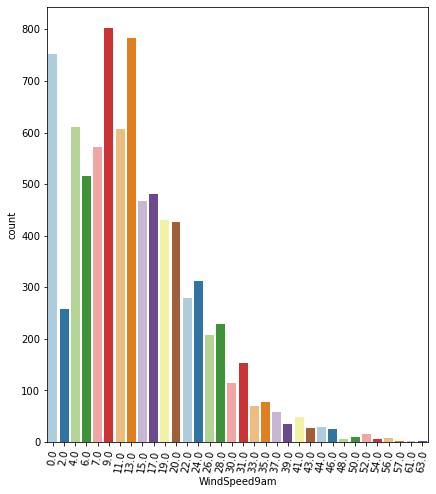

In [31]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['WindSpeed9am'],palette='Paired')
plt.xticks(rotation=80)

Wind speed at 9 am is skewwed towards left, and some outliers present in the dataset.



C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '6.0'),
  Text(4, 0, '7.0'),
  Text(5, 0, '9.0'),
  Text(6, 0, '11.0'),
  Text(7, 0, '13.0'),
  Text(8, 0, '15.0'),
  Text(9, 0, '17.0'),
  Text(10, 0, '19.0'),
  Text(11, 0, '20.0'),
  Text(12, 0, '22.0'),
  Text(13, 0, '24.0'),
  Text(14, 0, '26.0'),
  Text(15, 0, '28.0'),
  Text(16, 0, '30.0'),
  Text(17, 0, '31.0'),
  Text(18, 0, '33.0'),
  Text(19, 0, '35.0'),
  Text(20, 0, '37.0'),
  Text(21, 0, '39.0'),
  Text(22, 0, '41.0'),
  Text(23, 0, '43.0'),
  Text(24, 0, '44.0'),
  Text(25, 0, '46.0'),
  Text(26, 0, '48.0'),
  Text(27, 0, '50.0'),
  Text(28, 0, '52.0'),
  Text(29, 0, '54.0'),
  Text(30, 0, '56.0'),
  Text(31, 0, '57.0'),
  Text(32, 0, '61.0'),
  Text(33, 0, '65.0'),
  Text(34, 0, '83.0')])

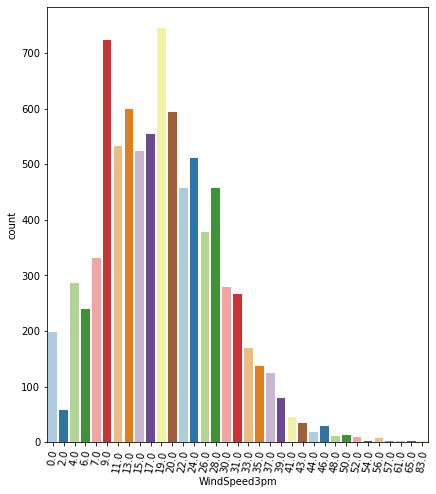

In [32]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['WindSpeed3pm'],palette='Paired')
plt.xticks(rotation=80)

We see some skewness in the data, and there are outliers which need to be treated



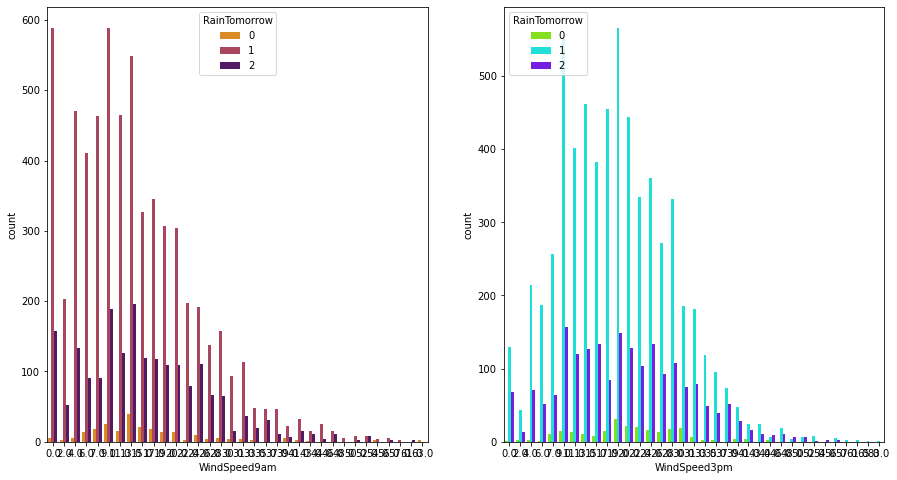

In [33]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='WindSpeed9am',hue='RainTomorrow',data=df, palette='inferno_r')
ax = plt.subplot(1,2,2)
sns.countplot(x='WindSpeed3pm',hue='RainTomorrow',data=df, palette='hsv')
plt.show()

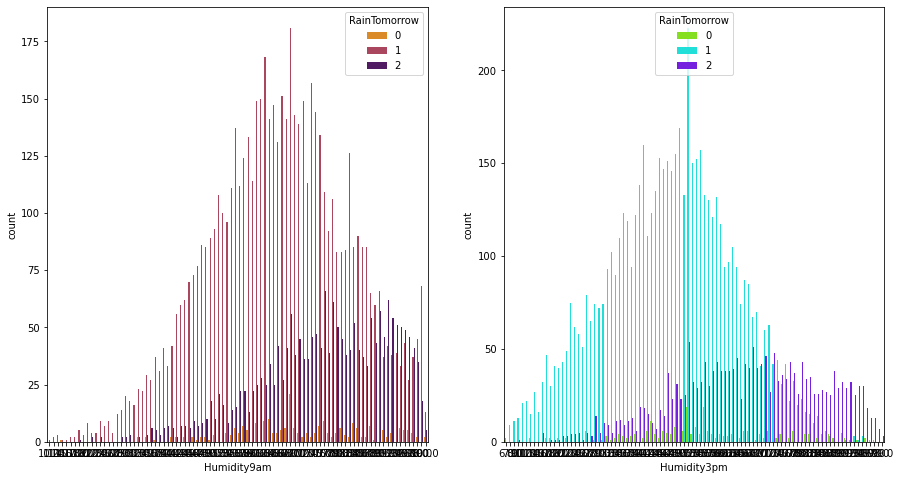

In [34]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='Humidity9am',hue='RainTomorrow',data=df, palette='inferno_r')
ax = plt.subplot(1,2,2)
sns.countplot(x='Humidity3pm',hue='RainTomorrow',data=df, palette='hsv')
plt.show()

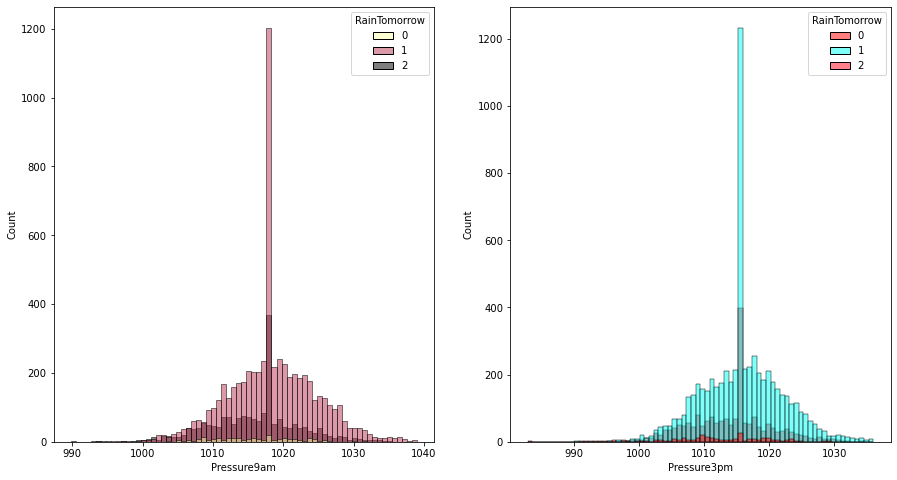

In [35]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(x='Pressure9am',hue='RainTomorrow',data=df, palette='inferno_r')
ax = plt.subplot(1,2,2)
sns.histplot(x='Pressure3pm',hue='RainTomorrow',data=df, palette='hsv')
plt.show()

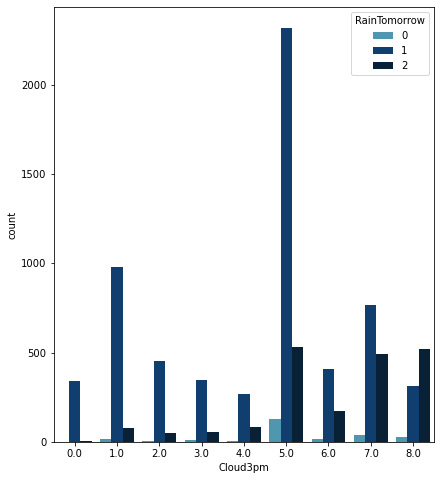

In [36]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.plot(1,2,1)
sns.countplot(x='Cloud9am',hue='RainTomorrow',data=df, palette='nipy_spectral_r')
ax = plt.subplot(1,2,2)
sns.countplot(x='Cloud3pm',hue='RainTomorrow',data=df, palette='ocean_r')
plt.show()

In [37]:
#Coorelation
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,month,year
Location,1.000000,0.116555,0.064220,0.005801,0.130778,0.086343,-0.035408,0.230018,-0.027103,-0.027736,...,-0.020292,0.037747,0.015868,0.118062,0.060441,-0.011944,-0.011594,-0.002019,-0.082407,0.486405
MinTemp,0.116555,1.000000,0.717522,0.085765,0.262887,0.031722,-0.145446,0.230200,-0.041781,-0.147147,...,-0.423261,0.078412,0.022147,0.887111,0.685859,0.043694,0.066901,0.009448,-0.245872,0.044200
MaxTemp,0.064220,0.717522,1.000000,-0.087595,0.326713,0.357559,-0.224078,0.139909,-0.213776,-0.180689,...,-0.403283,-0.255267,-0.252942,0.866085,0.974690,-0.205184,-0.143220,0.015662,-0.163056,0.119461
Rainfall,0.005801,0.085765,-0.087595,1.000000,0.020252,-0.166957,0.037106,0.082628,0.093072,0.038153,...,-0.031261,0.176615,0.142066,-0.007356,-0.090649,0.435554,0.205690,-0.013029,-0.016258,0.004491
Evaporation,0.130778,0.262887,0.326713,0.020252,1.000000,0.217816,-0.073549,0.147367,-0.055144,-0.048325,...,-0.189711,-0.078895,-0.119121,0.316489,0.318211,-0.070941,-0.047555,0.015478,0.012519,0.128610
Sunshine,0.086343,0.031722,0.357559,-0.166957,0.217816,1.000000,-0.105898,-0.034623,-0.082621,-0.062308,...,-0.032167,-0.489100,-0.511608,0.219706,0.376915,-0.190223,-0.268473,0.003420,-0.011949,0.134540
WindGustDir,-0.035408,-0.145446,-0.224078,0.037106,-0.073549,-0.105898,1.000000,0.025577,0.403562,0.505799,...,-0.025847,0.133499,0.102306,-0.176350,-0.237932,0.099953,0.042129,0.015683,0.034823,-0.088340
WindGustSpeed,0.230018,0.230200,0.139909,0.082628,0.147367,-0.034623,0.025577,1.000000,-0.068545,0.070677,...,-0.372553,0.019763,0.070237,0.202275,0.102066,0.049471,0.154195,-0.002454,0.051063,-0.049612
WindDir9am,-0.027103,-0.041781,-0.213776,0.093072,-0.055144,-0.082621,0.403562,-0.068545,1.000000,0.249527,...,0.072945,0.100780,0.064874,-0.103150,-0.221064,0.136868,0.024602,-0.015154,0.012544,-0.014498
WindDir3pm,-0.027736,-0.147147,-0.180689,0.038153,-0.048325,-0.062308,0.505799,0.070677,0.249527,1.000000,...,-0.043655,0.078786,0.056744,-0.165066,-0.194762,0.087479,0.005415,0.003089,0.029384,-0.005812


In [38]:
# Coorelation with the Target Column Rainfall 

df.corr()['Rainfall'].sort_values()

Sunshine        -0.166957
Temp3pm         -0.090649
MaxTemp         -0.087595
Pressure9am     -0.069595
Pressure3pm     -0.031261
month           -0.016258
date            -0.013029
Temp9am         -0.007356
year             0.004491
Location         0.005801
Evaporation      0.020252
WindSpeed3pm     0.021594
WindGustDir      0.037106
WindDir3pm       0.038153
WindSpeed9am     0.048726
WindGustSpeed    0.082628
MinTemp          0.085765
WindDir9am       0.093072
Cloud3pm         0.142066
Cloud9am         0.176615
RainTomorrow     0.205690
Humidity9am      0.227587
Humidity3pm      0.234955
RainToday        0.435554
Rainfall         1.000000
Name: Rainfall, dtype: float64

In [39]:
# Coorelation with the Target Column Rain Tommorow

df.corr()['RainTomorrow'].sort_values()

Sunshine        -0.268473
Temp3pm         -0.178481
MaxTemp         -0.143220
Pressure9am     -0.127966
Pressure3pm     -0.102799
Evaporation     -0.047555
month           -0.031081
Temp9am         -0.027224
year            -0.026464
Location        -0.011594
date            -0.010532
WindDir3pm       0.005415
WindDir9am       0.024602
WindSpeed3pm     0.035755
WindGustDir      0.042129
WindSpeed9am     0.049591
MinTemp          0.066901
WindGustSpeed    0.154195
Rainfall         0.205690
Cloud9am         0.218088
Humidity9am      0.234961
Cloud3pm         0.284159
RainToday        0.330684
Humidity3pm      0.393559
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

<AxesSubplot:>

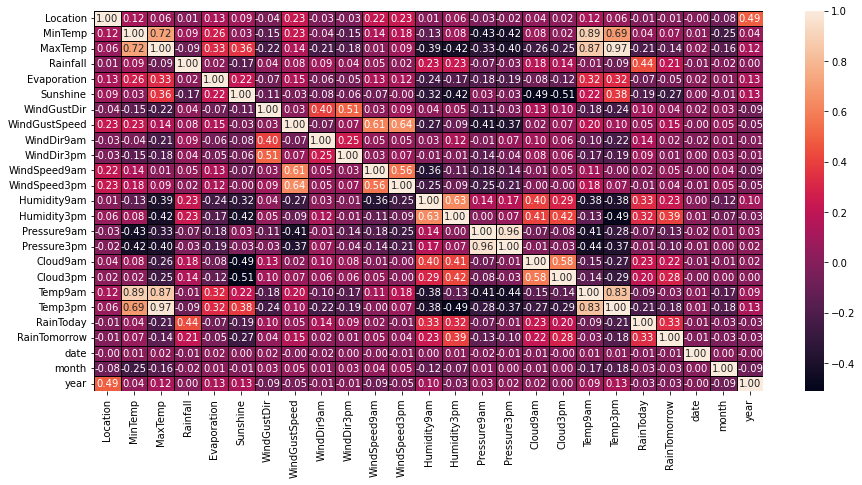

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

In [41]:
#Descriptive Statistics
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,month,year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.194255,23.855988,2.725982,5.060332,8.138409,7.217804,40.036320,7.267418,7.810445,...,1015.246030,4.691157,4.647953,17.762267,22.436748,1.207715,1.207953,15.741958,6.442136,2012.102433
std,3.162654,5.379497,6.114697,10.319872,3.871619,2.875324,4.702616,13.781296,4.588045,4.430162,...,6.217494,2.437110,2.310476,5.608301,5.946128,0.470711,0.470606,8.787354,3.437994,2.473137
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,8.400000,3.000000,31.000000,3.000000,4.000000,...,1011.400000,3.000000,3.000000,13.800000,18.100000,1.000000,1.000000,8.000000,3.000000,2010.000000
50%,6.000000,13.300000,23.300000,0.000000,4.600000,8.700000,7.000000,39.000000,7.000000,8.000000,...,1015.300000,5.000000,5.000000,17.800000,21.900000,1.000000,1.000000,16.000000,6.000000,2011.000000
75%,8.000000,17.300000,28.000000,0.800000,5.200000,8.900000,12.000000,48.000000,12.000000,11.000000,...,1018.800000,7.000000,7.000000,21.900000,26.300000,1.000000,1.000000,23.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,2.000000,2.000000,31.000000,12.000000,2017.000000


<AxesSubplot:>

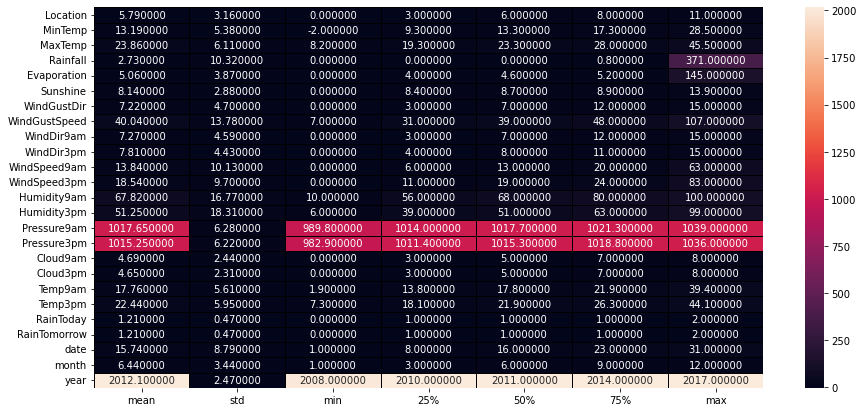

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

# Checking Data To Remove Skewness


Splitting the Data Removing the target column



In [44]:
# Setting the Target Columns At the Bottom

my_column = df.pop('Rainfall')
df.insert(24, 'Rainfall', my_column) 

my_column1 = df.pop('RainTomorrow')
df.insert(24, 'RainTomorrow', my_column1) 


df.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,date,month,year,Rainfall,RainTomorrow
0,1,13.4,22.9,4.6,8.7,13,44.0,13,14,20.0,...,8.0,5.0,16.9,21.8,1,1,12,2008,0.6,1
1,1,7.4,25.1,4.6,8.7,14,44.0,6,15,4.0,...,5.0,5.0,17.2,24.3,1,2,12,2008,0.0,1
2,1,12.9,25.7,4.6,8.7,15,46.0,13,15,19.0,...,5.0,2.0,21.0,23.2,1,3,12,2008,0.0,1
3,1,9.2,28.0,4.6,8.7,4,24.0,9,0,11.0,...,5.0,5.0,18.1,26.5,1,4,12,2008,0.0,1
4,1,17.5,32.3,4.6,8.7,13,41.0,1,7,7.0,...,7.0,8.0,17.8,29.7,1,5,12,2008,1.0,1


In [45]:
df.iloc[:,:-2].skew()

Location         -0.050456
MinTemp          -0.090519
MaxTemp           0.382572
Evaporation      14.064000
Sunshine         -1.189333
WindGustDir       0.119640
WindGustSpeed     0.786153
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.962761
WindSpeed3pm      0.492365
Humidity9am      -0.256965
Humidity3pm       0.118776
Pressure9am      -0.028521
Pressure3pm      -0.015018
Cloud9am         -0.514801
Cloud3pm         -0.457713
Temp9am          -0.014883
Temp3pm           0.400388
RainToday         0.582207
date              0.004260
month             0.039388
year              0.418663
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-2],method='yeo-johnson')

df.iloc[:,:-2]=pd.DataFrame(x_new,columns=df.iloc[:,:-2].columns)

In [47]:
df.iloc[:,:-2].skew()

Location        -0.186657
MinTemp         -0.103136
MaxTemp         -0.010470
Evaporation      0.012404
Sunshine        -0.229385
WindGustDir     -0.187177
WindGustSpeed    0.010481
WindDir9am      -0.155025
WindDir3pm      -0.248689
WindSpeed9am    -0.078875
WindSpeed3pm    -0.037960
Humidity9am     -0.067279
Humidity3pm     -0.038680
Pressure9am      0.002744
Pressure3pm      0.002018
Cloud9am        -0.344988
Cloud3pm        -0.288661
Temp9am         -0.049015
Temp3pm         -0.009722
RainToday        0.046247
date            -0.211250
month           -0.155749
year             0.412834
dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


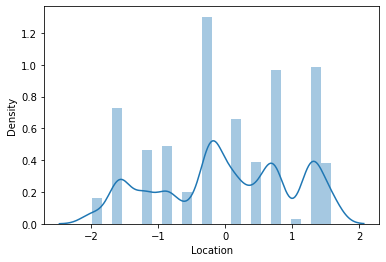

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


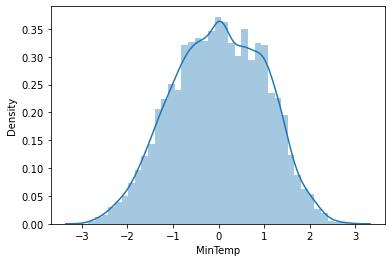

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


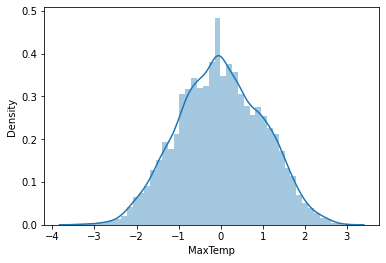

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


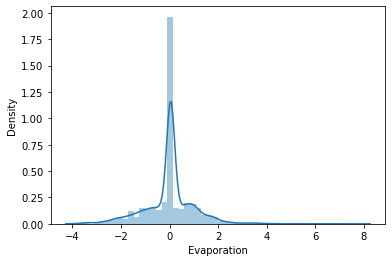

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


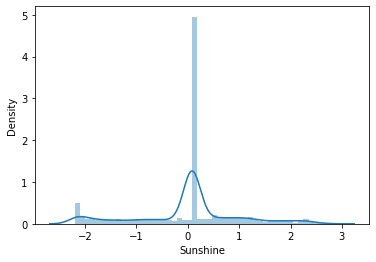

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


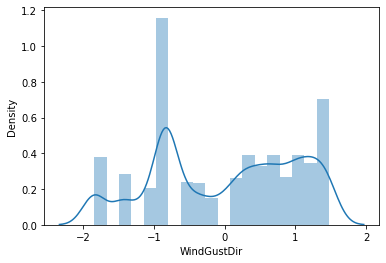

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


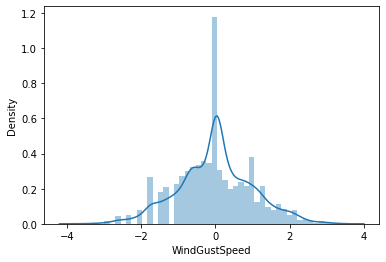

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


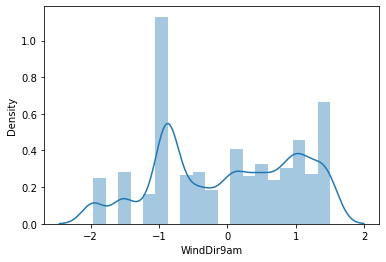

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


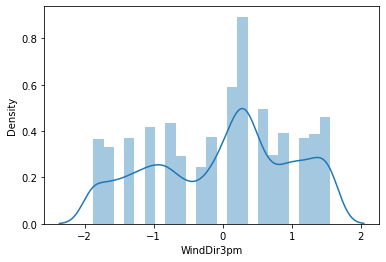

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


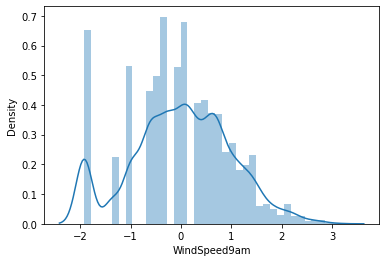

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


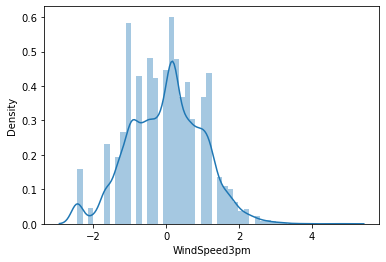

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


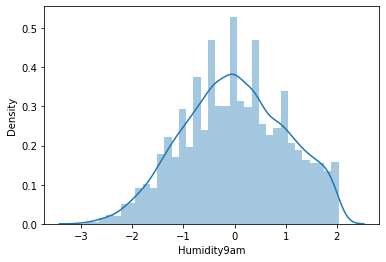

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


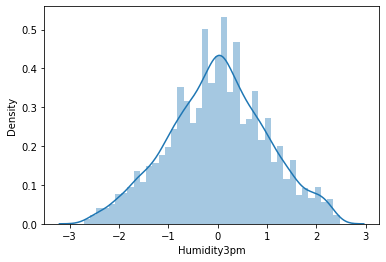

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


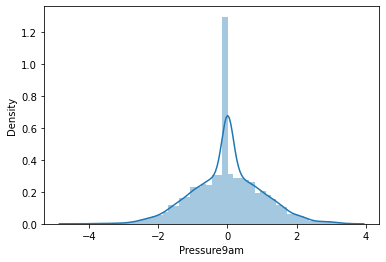

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


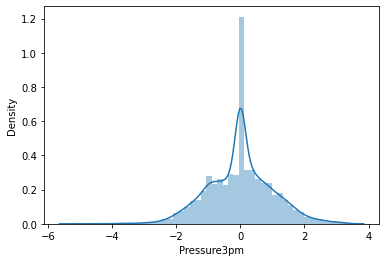

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


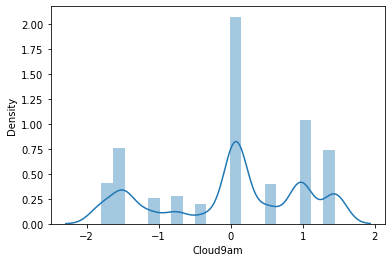

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


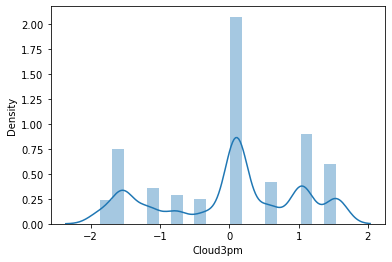

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


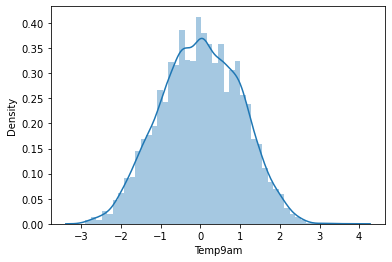

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


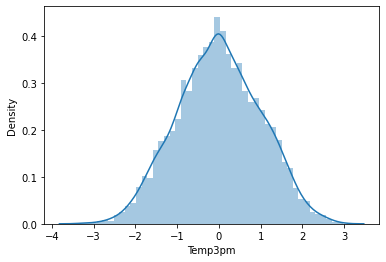

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


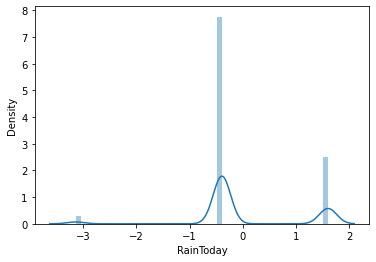

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


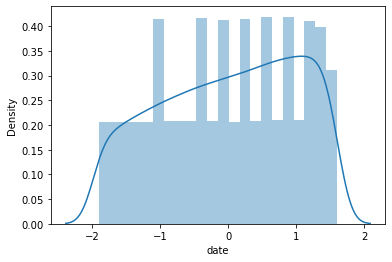

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


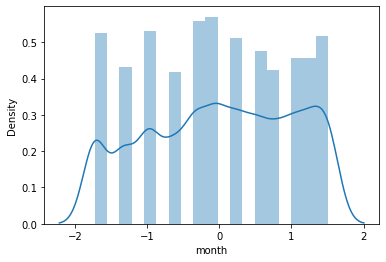

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


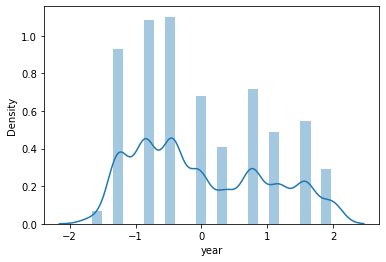

In [48]:
for col in df.iloc[:,:-2].columns:
    sns.distplot(df.iloc[:,:-2][col])
    plt.show()

Location            AxesSubplot(0.125,0.787927;0.168478x0.0920732)
MinTemp          AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
MaxTemp          AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Evaporation      AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
Sunshine            AxesSubplot(0.125,0.677439;0.168478x0.0920732)
WindGustDir      AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
WindGustSpeed    AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
WindDir9am       AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
WindDir3pm          AxesSubplot(0.125,0.566951;0.168478x0.0920732)
WindSpeed9am     AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
WindSpeed3pm     AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
Humidity9am      AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
Humidity3pm         AxesSubplot(0.125,0.456463;0.168478x0.0920732)
Pressure9am      AxesSubplot(0.327174,0.456463;0.168478x0.0920732)
Pressure3pm      AxesSubplot(0.529348,0.456463;0.168478x0.0920

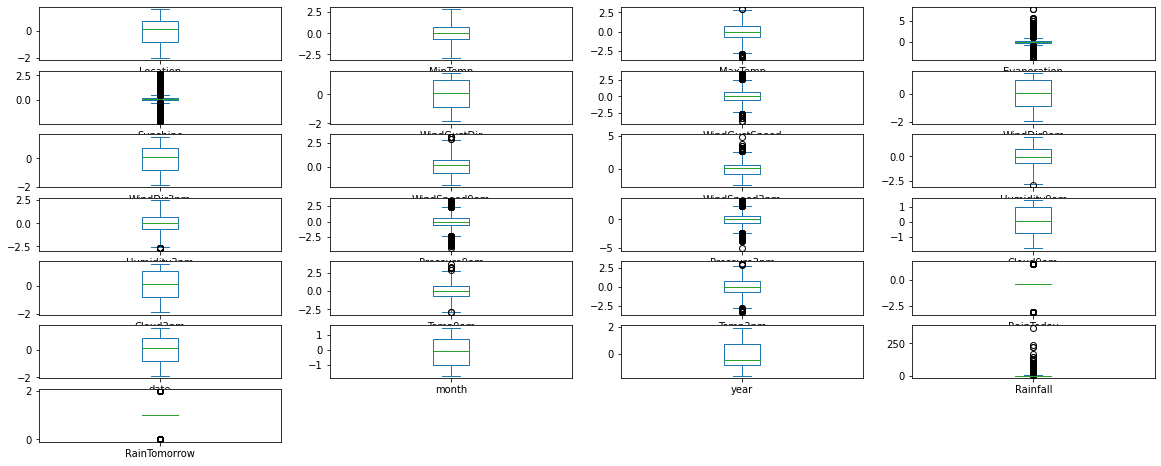

In [49]:
#Outliers Checking
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(7,4), figsize=[20,8])

In [50]:
#IQR Proximity Rule
#Z - Score Technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(8425, 25)

In [51]:
threshold=3
print(np.where(z>3))

(array([  12,   12,   15,   52,  123,  190,  190,  193,  193,  238,  238,
        284,  296,  381,  431,  436,  438,  444,  453,  456,  462,  465,
        466,  555,  555,  567,  568,  568,  569,  574,  574,  602,  608,
        612,  683,  683,  699,  713,  748,  770,  796,  797,  802,  928,
        929,  935,  949,  979,  980, 1008, 1008, 1009, 1011, 1138, 1148,
       1149, 1151, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1369, 1387,
       1411, 1412, 1413, 1413, 1426, 1467, 1479, 1480, 1480, 1481, 1513,
       1644, 1661, 1665, 1673, 1680, 1774, 1812, 1813, 1814, 1815, 1816,
       1817, 1818, 1819, 1873, 1898, 2028, 2043, 2063, 2069, 2108, 2116,
       2164, 2165, 2166, 2167, 2199, 2200, 2201, 2219, 2230, 2231, 2265,
       2346, 2373, 2389, 2429, 2460, 2488, 2506, 2541, 2593, 2676, 2677,
       2679, 2710, 2735, 2738, 2743, 2744, 2768, 2825, 2826, 2835, 2838,
       2839, 2840, 2846, 2847, 2848, 2849, 2849, 2855, 2863, 2869, 2877,
       2883, 2890, 2891, 2897, 2898, 2900, 2901, 2

In [52]:
len(np.where(z>3)[0])

654

In [53]:
df.drop([12,   12,   15,   52,  123,  190,  190,  193,  193,  238,  238,
        284,  296,  381,  431,  436,  438,  444,  453,  456,  462,  465,
        466,  555,  555,  567,  568,  568,  569,  574,  574,  602,  608,
        612,  683,  683,  699,  713,  748,  770,  796,  797,  802,  928,
        929,  935,  949,  979,  980, 1008, 1008, 1009, 1011, 1138, 1148,
       1149, 1151, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1369, 1387,
       1411, 1412, 1413, 1413, 1426, 1467, 1479, 1480, 1480, 1481, 1513,
       1644, 1661, 1665, 1673, 1680, 1774, 1812, 1813, 1814, 1815, 1816,
       1817, 1818, 1819, 1873, 1898, 2028, 2043, 2063, 2069, 2108, 2116,
       2164, 2165, 2166, 2167, 2199, 2200, 2201, 2219, 2230, 2231, 2265,
       2346, 2373, 2389, 2429, 2460, 2488, 2506, 2541, 2593, 2676, 2677,
       2679, 2710, 2735, 2738, 2743, 2744, 2768, 2825, 2826, 2835, 2838,
       2839, 2840, 2846, 2847, 2848, 2849, 2849, 2855, 2863, 2869, 2877,
       2883, 2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919,
       2933, 2939, 2947, 2953, 2961, 2967, 2972, 2973, 2974, 2975, 2989,
       3003, 3007, 3008, 3051, 3051, 3058, 3059, 3059, 3060, 3067, 3082,
       3098, 3099, 3101, 3139, 3141, 3157, 3164, 3167, 3172, 3178, 3206,
       3211, 3212, 3212, 3213, 3221, 3227, 3230, 3231, 3232, 3233, 3234,
       3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245,
       3246, 3247, 3248, 3248, 3253, 3254, 3255, 3257, 3258, 3259, 3260,
       3278, 3303, 3350, 3419, 3421, 3430, 3437, 3438, 3439, 3449, 3449,
       3449, 3450, 3571, 3607, 3614, 3621, 3677, 3678, 3687, 3690, 3691,
       3692, 3698, 3699, 3700, 3701, 3701, 3707, 3715, 3721, 3729, 3735,
       3742, 3743, 3749, 3750, 3752, 3753, 3757, 3761, 3763, 3771, 3785,
       3791, 3799, 3805, 3813, 3819, 3824, 3825, 3826, 3827, 3841, 3855,
       3859, 3860, 3903, 3903, 3910, 3911, 3911, 3912, 3919, 3934, 3950,
       3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030, 4058, 4063,
       4064, 4064, 4065, 4073, 4079, 4082, 4083, 4084, 4085, 4086, 4087,
       4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098,
       4099, 4100, 4100, 4105, 4106, 4107, 4109, 4110, 4111, 4112, 4130,
       4155, 4202, 4271, 4273, 4282, 4289, 4290, 4291, 4301, 4301, 4301,
       4302, 4423, 4459, 4466, 4473, 4528, 4528, 4568, 4568, 4619, 4638,
       4650, 4672, 4673, 4678, 4678, 4728, 4741, 4763, 4771, 4779, 4780,
       4780, 4785, 4797, 4811, 4812, 4814, 4854, 4854, 4895, 4895, 4911,
       4960, 4960, 5008, 5009, 5010, 5015, 5016, 5022, 5023, 5027, 5028,
       5086, 5091, 5092, 5097, 5098, 5102, 5103, 5104, 5105, 5106, 5108,
       5111, 5112, 5122, 5122, 5123, 5132, 5133, 5134, 5138, 5143, 5145,
       5146, 5147, 5147, 5150, 5160, 5161, 5164, 5165, 5167, 5168, 5168,
       5173, 5175, 5175, 5176, 5176, 5181, 5182, 5214, 5214, 5214, 5216,
       5217, 5223, 5224, 5230, 5231, 5237, 5237, 5238, 5243, 5244, 5245,
       5247, 5251, 5252, 5258, 5259, 5265, 5266, 5269, 5272, 5273, 5274,
       5286, 5287, 5288, 5300, 5301, 5301, 5302, 5303, 5315, 5321, 5322,
       5334, 5335, 5336, 5339, 5339, 5379, 5379, 5430, 5449, 5461, 5483,
       5484, 5489, 5489, 5539, 5552, 5574, 5582, 5590, 5591, 5591, 5596,
       5608, 5622, 5623, 5625, 5665, 5665, 5706, 5706, 5722, 5771, 5771,
       5819, 5820, 5821, 5826, 5827, 5833, 5834, 5838, 5839, 5897, 5902,
       5903, 5908, 5909, 5913, 5914, 5915, 5916, 5917, 5919, 5922, 5923,
       5933, 5933, 5934, 5943, 5944, 5945, 5949, 5954, 5956, 5957, 5958,
       5958, 5961, 5971, 5972, 5975, 5976, 5978, 5979, 5979, 5984, 5986,
       5986, 5987, 5987, 5992, 5993, 6025, 6025, 6025, 6027, 6028, 6034,
       6035, 6041, 6042, 6048, 6048, 6049, 6054, 6055, 6056, 6058, 6062,
       6063, 6069, 6070, 6076, 6077, 6080, 6083, 6084, 6085, 6097, 6098,
       6099, 6111, 6112, 6112, 6113, 6114, 6126, 6132, 6133, 6145, 6146,
       6147, 6149, 6182, 6203, 6252, 6258, 6262, 6295, 6432, 6441, 6480,
       6481, 6489, 6496, 6520, 6583, 6584, 6617, 6626, 6660, 6758, 6766,
       6780, 6782, 6786, 6786, 6793, 6794, 6794, 6862, 6876, 6881, 6904,
       6909, 6910, 6916, 6918, 6925, 6960, 6978, 6993, 7111, 7128, 7132,
       7142, 7169, 7186, 7186, 7187, 7187, 7188, 7282, 7462, 7463, 7468,
       7473, 7494, 7633, 7633, 7735, 7735, 7827, 7857, 7984, 8100, 8114,
       8119, 8136, 8144, 8145, 8185],axis=0)

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,date,month,year,Rainfall,RainTomorrow
0,-1.572870,0.040870,-0.076112,0.048093,0.083363,1.160646,0.394268,1.179858,1.349376,0.718789,...,1.444381,0.104017,-0.146635,-0.025589,-0.392982,-1.893365,1.511409,-1.664814,0.6,1
1,-1.572870,-1.076476,0.281346,0.048093,0.083363,1.319872,0.394268,-0.140685,1.552244,-0.990156,...,0.072388,0.104017,-0.093163,0.386799,-0.392982,-1.710758,1.511409,-1.664814,0.0,1
2,-1.572870,-0.051970,0.375344,0.048093,0.083363,1.474872,0.529217,1.179858,1.552244,0.639451,...,0.072388,-1.168016,0.580965,0.208746,-0.392982,-1.544131,1.511409,-1.664814,0.0,1
3,-1.572870,-0.740439,0.723218,0.048093,0.083363,-0.578373,-1.258863,0.473499,-1.874337,-0.089100,...,0.072388,0.104017,0.067020,0.728459,-0.392982,-1.388459,1.511409,-1.664814,0.0,1
4,-1.572870,0.800709,1.327389,0.048093,0.083363,1.160646,0.183934,-1.528740,-0.137530,-0.553319,...,0.972481,1.540704,0.013664,1.195267,-0.392982,-1.240995,1.511409,-1.664814,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.002532,-1.940165,0.006985,0.048093,0.083363,-1.843336,-0.601802,0.473499,-1.588620,0.112350,...,0.072388,0.104017,-1.371024,0.075945,-0.392982,0.632681,-0.053320,1.975807,0.0,1
8421,1.002532,-1.789282,0.312836,0.048093,0.083363,-0.122677,-1.469455,0.473499,-1.071926,0.112350,...,0.072388,0.104017,-1.225551,0.418633,-0.392982,0.733618,-0.053320,1.975807,0.0,1
8422,1.002532,-1.450956,0.559218,0.048093,0.083363,-0.833869,-0.113140,0.473499,1.349376,-0.308990,...,0.072388,0.104017,-0.935876,0.667686,-0.392982,0.833381,-0.053320,1.975807,0.0,1
8423,1.002532,-1.001727,0.574303,0.048093,0.083363,0.471492,-0.869984,0.659979,-1.071926,0.112350,...,-0.756943,-1.168016,-0.468326,0.652403,-0.392982,0.932033,-0.053320,1.975807,0.0,1


In [54]:
df=df[(z<3).all(axis=1)]

In [55]:
df.shape

(7834, 25)

Feature Engineering ( Variantion Inflation Factor )

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
df.corr()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,date,month,year,Rainfall,RainTomorrow
Location,1.000000,0.111298,0.062783,0.106763,0.062215,-0.037738,0.260534,-0.043605,-0.020797,0.237855,...,0.032757,0.025127,0.107422,0.058135,0.011184,-0.001631,-0.104843,0.466982,0.024256,0.015527
MinTemp,0.111298,1.000000,0.725342,0.381876,0.069703,-0.154399,0.249136,-0.054870,-0.147021,0.163069,...,0.073590,0.024501,0.888423,0.692838,0.063094,0.012185,-0.302692,0.025803,0.087924,0.086479
MaxTemp,0.062783,0.725342,1.000000,0.472887,0.385514,-0.238588,0.147423,-0.216985,-0.181913,0.022563,...,-0.260746,-0.255222,0.870606,0.974552,-0.226079,0.018494,-0.215821,0.110671,-0.141497,-0.143576
Evaporation,0.106763,0.381876,0.472887,1.000000,0.425832,-0.120781,0.195116,-0.098597,-0.038570,0.126329,...,-0.128645,-0.148918,0.454459,0.456577,-0.172439,0.012310,-0.058701,0.110371,-0.100703,-0.083327
Sunshine,0.062215,0.069703,0.385514,0.425832,1.000000,-0.128790,0.011452,-0.105370,-0.065237,-0.018848,...,-0.526184,-0.545613,0.261062,0.405975,-0.225761,0.003850,-0.024476,0.081549,-0.167793,-0.289975
WindGustDir,-0.037738,-0.154399,-0.238588,-0.120781,-0.128790,1.000000,0.000329,0.406421,0.498720,0.053899,...,0.140182,0.105970,-0.185909,-0.250803,0.129108,0.018894,0.040525,-0.093069,0.083634,0.055121
WindGustSpeed,0.260534,0.249136,0.147423,0.195116,0.011452,0.000329,1.000000,-0.084004,0.080250,0.556620,...,0.004046,0.065076,0.226058,0.107483,0.074198,0.003152,0.026546,-0.042679,0.079837,0.151042
WindDir9am,-0.043605,-0.054870,-0.216985,-0.098597,-0.105370,0.406421,-0.084004,1.000000,0.245736,0.104767,...,0.097122,0.068427,-0.113131,-0.224497,0.152669,-0.011221,0.017348,-0.021688,0.121586,0.026925
WindDir3pm,-0.020797,-0.147021,-0.181913,-0.038570,-0.065237,0.498720,0.080250,0.245736,1.000000,0.028807,...,0.080117,0.051788,-0.161853,-0.194808,0.101596,0.003997,0.038662,0.001399,0.073680,0.006902
WindSpeed9am,0.237855,0.163069,0.022563,0.126329,-0.018848,0.053899,0.556620,0.104767,0.028807,1.000000,...,-0.012364,0.044062,0.139514,0.003593,0.037549,-0.006313,0.024019,-0.111268,0.039129,0.045177


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'Location'),
  Text(0, 1.5, 'MinTemp'),
  Text(0, 2.5, 'MaxTemp'),
  Text(0, 3.5, 'Evaporation'),
  Text(0, 4.5, 'Sunshine'),
  Text(0, 5.5, 'WindGustDir'),
  Text(0, 6.5, 'WindGustSpeed'),
  Text(0, 7.5, 'WindDir9am'),
  Text(0, 8.5, 'WindDir3pm'),
  Text(0, 9.5, 'WindSpeed9am'),
  Text(0, 10.5, 'WindSpeed3pm'),
  Text(0, 11.5, 'Humidity9am'),
  Text(0, 12.5, 'Humidity3pm'),
  Text(0, 13.5, 'Pressure9am'),
  Text(0, 14.5, 'Pressure3pm'),
  Text(0, 15.5, 'Cloud9am'),
  Text(0, 16.5, 'Cloud3pm'),
  Text(0, 17.5, 'Temp9am'),
  Text(0, 18.5, 'Temp3pm'),
  Text(0, 19.5, 'RainToday'),
  Text(0, 20.5, 'date'),
  Text(0, 21.5, 'month'),
  Text(0, 22.5, 'year'),
  Text(0, 23.5, 'Rainfall'),
  Text(0, 24.5, 'RainTomorrow')])

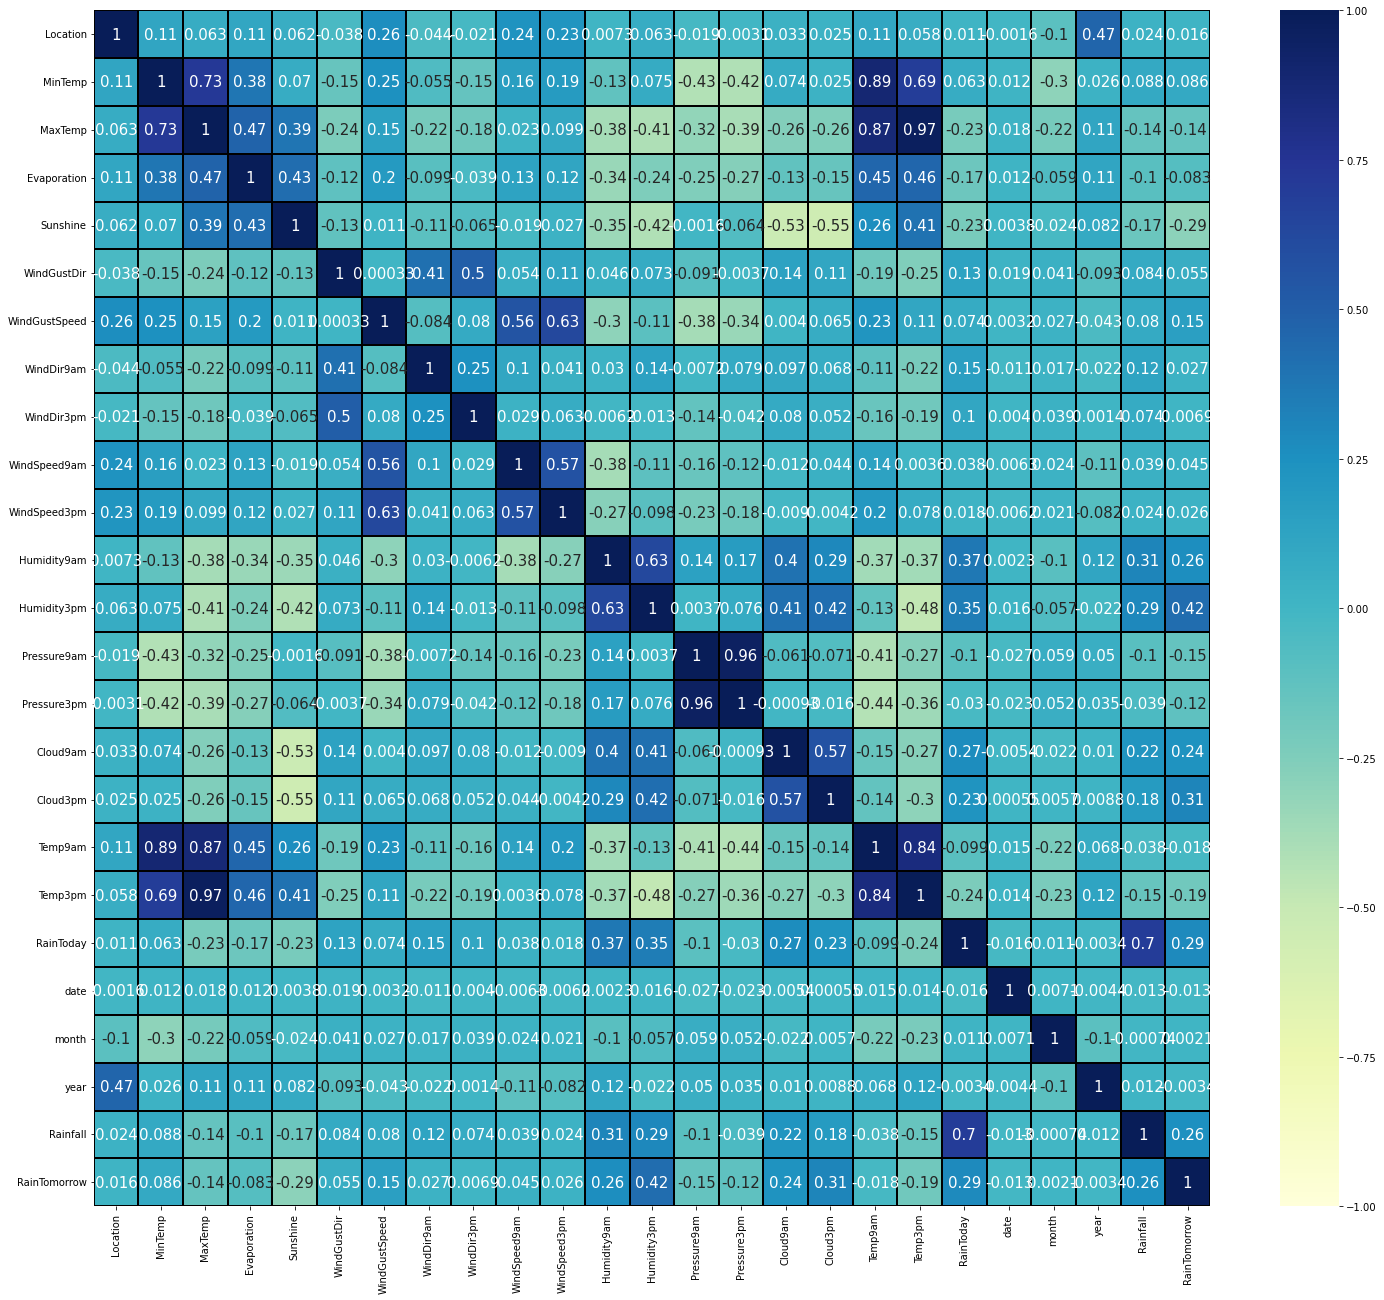

In [58]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

Splitting the Dataset and removing the Target Columns



In [59]:
x1=df.drop('Rainfall',axis=1)
y1=df['Rainfall']


x2=df.drop('RainTomorrow',axis=1)
y2=df['RainTomorrow']

In [60]:
x1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,date,month,year,RainTomorrow
0,-1.572870,0.040870,-0.076112,0.048093,0.083363,1.160646,0.394268,1.179858,1.349376,0.718789,...,-1.308715,1.444381,0.104017,-0.146635,-0.025589,-0.392982,-1.893365,1.511409,-1.664814,1
1,-1.572870,-1.076476,0.281346,0.048093,0.083363,1.319872,0.394268,-0.140685,1.552244,-0.990156,...,-1.196743,0.072388,0.104017,-0.093163,0.386799,-0.392982,-1.710758,1.511409,-1.664814,1
2,-1.572870,-0.051970,0.375344,0.048093,0.083363,1.474872,0.529217,1.179858,1.552244,0.639451,...,-1.052695,0.072388,-1.168016,0.580965,0.208746,-0.392982,-1.544131,1.511409,-1.664814,1
3,-1.572870,-0.740439,0.723218,0.048093,0.083363,-0.578373,-1.258863,0.473499,-1.874337,-0.089100,...,-0.395309,0.072388,0.104017,0.067020,0.728459,-0.392982,-1.388459,1.511409,-1.664814,1
4,-1.572870,0.800709,1.327389,0.048093,0.083363,1.160646,0.183934,-1.528740,-0.137530,-0.553319,...,-1.484560,0.972481,1.540704,0.013664,1.195267,-0.392982,-1.240995,1.511409,-1.664814,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.002532,-1.940165,0.006985,0.048093,0.083363,-1.843336,-0.601802,0.473499,-1.588620,0.112350,...,0.812188,0.072388,0.104017,-1.371024,0.075945,-0.392982,0.632681,-0.053320,1.975807,1
8421,1.002532,-1.789282,0.312836,0.048093,0.083363,-0.122677,-1.469455,0.473499,-1.071926,0.112350,...,0.618558,0.072388,0.104017,-1.225551,0.418633,-0.392982,0.733618,-0.053320,1.975807,1
8422,1.002532,-1.450956,0.559218,0.048093,0.083363,-0.833869,-0.113140,0.473499,1.349376,-0.308990,...,0.247892,0.072388,0.104017,-0.935876,0.667686,-0.392982,0.833381,-0.053320,1.975807,1
8423,1.002532,-1.001727,0.574303,0.048093,0.083363,0.471492,-0.869984,0.659979,-1.071926,0.112350,...,0.199589,-0.756943,-1.168016,-0.468326,0.652403,-0.392982,0.932033,-0.053320,1.975807,1


In [61]:
def vif_calc1():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
  vif["features"]=x1.columns
  print(vif)
vif_calc1()

    VIF Factor       features
0     1.571676       Location
1     8.792241        MinTemp
2    26.514925        MaxTemp
3     1.627087    Evaporation
4     2.047806       Sunshine
5     1.606957    WindGustDir
6     2.299128  WindGustSpeed
7     1.357952     WindDir9am
8     1.482553     WindDir3pm
9     2.039300   WindSpeed9am
10    1.982554   WindSpeed3pm
11    4.053966    Humidity9am
12    5.434448    Humidity3pm
13   19.897070    Pressure9am
14   18.812593    Pressure3pm
15    1.924727       Cloud9am
16    1.813541       Cloud3pm
17   17.658506        Temp9am
18   33.564911        Temp3pm
19    1.407603      RainToday
20    1.004335           date
21    1.195377          month
22    1.503199           year
23    1.047241   RainTomorrow


In [62]:
x1.drop(['Temp3pm'],axis=1,inplace=True)
vif_calc1()

    VIF Factor       features
0     1.568734       Location
1     8.729992        MinTemp
2     9.897503        MaxTemp
3     1.627070    Evaporation
4     2.046500       Sunshine
5     1.605355    WindGustDir
6     2.274941  WindGustSpeed
7     1.357886     WindDir9am
8     1.480281     WindDir3pm
9     2.038574   WindSpeed9am
10    1.982376   WindSpeed3pm
11    3.591386    Humidity9am
12    3.661117    Humidity3pm
13   19.300283    Pressure9am
14   18.366272    Pressure3pm
15    1.923388       Cloud9am
16    1.802868       Cloud3pm
17   16.304015        Temp9am
18    1.406242      RainToday
19    1.004225           date
20    1.180048          month
21    1.503199           year
22    1.047227   RainTomorrow


In [63]:
x1.drop(['Pressure9am'],axis=1,inplace=True)
x1.drop(['Temp9am'],axis=1,inplace=True)
vif_calc1()

    VIF Factor       features
0     1.567486       Location
1     4.714583        MinTemp
2     5.517685        MaxTemp
3     1.608283    Evaporation
4     2.033671       Sunshine
5     1.590820    WindGustDir
6     2.220039  WindGustSpeed
7     1.332336     WindDir9am
8     1.402561     WindDir3pm
9     2.018350   WindSpeed9am
10    1.934946   WindSpeed3pm
11    2.575149    Humidity9am
12    2.906160    Humidity3pm
13    1.412547    Pressure3pm
14    1.903270       Cloud9am
15    1.798767       Cloud3pm
16    1.383968      RainToday
17    1.003411           date
18    1.166370          month
19    1.479090           year
20    1.045911   RainTomorrow


Now We Can see that the all columns vif valuwe is under 10 now its ok



In [64]:
x2

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,date,month,year,Rainfall
0,-1.572870,0.040870,-0.076112,0.048093,0.083363,1.160646,0.394268,1.179858,1.349376,0.718789,...,-1.308715,1.444381,0.104017,-0.146635,-0.025589,-0.392982,-1.893365,1.511409,-1.664814,0.6
1,-1.572870,-1.076476,0.281346,0.048093,0.083363,1.319872,0.394268,-0.140685,1.552244,-0.990156,...,-1.196743,0.072388,0.104017,-0.093163,0.386799,-0.392982,-1.710758,1.511409,-1.664814,0.0
2,-1.572870,-0.051970,0.375344,0.048093,0.083363,1.474872,0.529217,1.179858,1.552244,0.639451,...,-1.052695,0.072388,-1.168016,0.580965,0.208746,-0.392982,-1.544131,1.511409,-1.664814,0.0
3,-1.572870,-0.740439,0.723218,0.048093,0.083363,-0.578373,-1.258863,0.473499,-1.874337,-0.089100,...,-0.395309,0.072388,0.104017,0.067020,0.728459,-0.392982,-1.388459,1.511409,-1.664814,0.0
4,-1.572870,0.800709,1.327389,0.048093,0.083363,1.160646,0.183934,-1.528740,-0.137530,-0.553319,...,-1.484560,0.972481,1.540704,0.013664,1.195267,-0.392982,-1.240995,1.511409,-1.664814,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.002532,-1.940165,0.006985,0.048093,0.083363,-1.843336,-0.601802,0.473499,-1.588620,0.112350,...,0.812188,0.072388,0.104017,-1.371024,0.075945,-0.392982,0.632681,-0.053320,1.975807,0.0
8421,1.002532,-1.789282,0.312836,0.048093,0.083363,-0.122677,-1.469455,0.473499,-1.071926,0.112350,...,0.618558,0.072388,0.104017,-1.225551,0.418633,-0.392982,0.733618,-0.053320,1.975807,0.0
8422,1.002532,-1.450956,0.559218,0.048093,0.083363,-0.833869,-0.113140,0.473499,1.349376,-0.308990,...,0.247892,0.072388,0.104017,-0.935876,0.667686,-0.392982,0.833381,-0.053320,1.975807,0.0
8423,1.002532,-1.001727,0.574303,0.048093,0.083363,0.471492,-0.869984,0.659979,-1.071926,0.112350,...,0.199589,-0.756943,-1.168016,-0.468326,0.652403,-0.392982,0.932033,-0.053320,1.975807,0.0


In [65]:
def vif_calc2():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x2.values,i) for i in range(x2.shape[1])]
  vif["features"]=x2.columns
  print(vif)

In [66]:
vif_calc2()

    VIF Factor       features
0     1.571607       Location
1     8.788348        MinTemp
2    26.511655        MaxTemp
3     1.627183    Evaporation
4     2.047512       Sunshine
5     1.607558    WindGustDir
6     2.298798  WindGustSpeed
7     1.358231     WindDir9am
8     1.482662     WindDir3pm
9     2.039439   WindSpeed9am
10    1.982237   WindSpeed3pm
11    4.052834    Humidity9am
12    5.416896    Humidity3pm
13   19.887191    Pressure9am
14   18.800417    Pressure3pm
15    1.925143       Cloud9am
16    1.812413       Cloud3pm
17   17.663403        Temp9am
18   33.583045        Temp3pm
19    2.167135      RainToday
20    1.004332           date
21    1.194379          month
22    1.503066           year
23    1.859004       Rainfall


In [67]:
x2.drop(['Temp3pm'],axis=1,inplace=True)
vif_calc2()

    VIF Factor       features
0     1.568639       Location
1     8.725008        MinTemp
2     9.893616        MaxTemp
3     1.627161    Evaporation
4     2.046234       Sunshine
5     1.606003    WindGustDir
6     2.274216  WindGustSpeed
7     1.358156     WindDir9am
8     1.480369     WindDir3pm
9     2.038685   WindSpeed9am
10    1.982077   WindSpeed3pm
11    3.592426    Humidity9am
12    3.639155    Humidity3pm
13   19.287169    Pressure9am
14   18.351261    Pressure3pm
15    1.923840       Cloud9am
16    1.801715       Cloud3pm
17   16.313981        Temp9am
18    2.163716      RainToday
19    1.004219           date
20    1.179072          month
21    1.503065           year
22    1.857975       Rainfall


In [68]:
x2.drop(['Pressure9am'],axis=1,inplace=True)
x2.drop(['Temp9am'],axis=1,inplace=True)

In [69]:
vif_calc2()

    VIF Factor       features
0     1.567346       Location
1     4.703264        MinTemp
2     5.512965        MaxTemp
3     1.608561    Evaporation
4     2.033566       Sunshine
5     1.591307    WindGustDir
6     2.219838  WindGustSpeed
7     1.332550     WindDir9am
8     1.402681     WindDir3pm
9     2.018353   WindSpeed9am
10    1.934226   WindSpeed3pm
11    2.571529    Humidity9am
12    2.884919    Humidity3pm
13    1.412268    Pressure3pm
14    1.903553       Cloud9am
15    1.797709       Cloud3pm
16    2.150606      RainToday
17    1.003395           date
18    1.165509          month
19    1.478981           year
20    1.855610       Rainfall


In [70]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
x1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,date,month,year,RainTomorrow
0,-1.556935,0.050050,-0.089061,0.052158,0.055362,1.170854,0.423405,1.189195,1.353212,0.739538,...,0.182072,-1.633318,-1.385292,1.457992,0.121765,-0.54598,-1.891036,1.539049,-1.657166,-0.488057
1,-1.556935,-1.062020,0.271696,0.052158,0.055362,1.329768,0.423405,-0.129601,1.556201,-0.963542,...,-1.378444,-1.449114,-1.267598,0.096090,0.121765,-0.54598,-1.708678,1.539049,-1.657166,-0.488057
2,-1.556935,-0.042352,0.366562,0.052158,0.055362,1.484464,0.560465,1.189195,1.556201,0.660472,...,-1.692168,-1.149430,-1.116191,0.096090,-1.143486,-0.54598,-1.542278,1.539049,-1.657166,-0.488057
3,-1.556935,-0.727570,0.717647,0.052158,0.055362,-0.564759,-1.255592,0.483771,-1.872412,-0.065578,...,-1.324843,-2.014144,-0.425218,0.096090,0.121765,-0.54598,-1.386819,1.539049,-1.657166,-0.488057
4,-1.556935,0.806301,1.327395,0.052158,0.055362,1.170854,0.209779,-1.515820,-0.134575,-0.528204,...,0.876487,-0.973399,-1.570120,0.989563,1.550791,-0.54598,-1.239557,1.539049,-1.657166,-0.488057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7829,1.016769,-1.921631,-0.005197,0.052158,0.055362,-1.827244,-0.588251,0.483771,-1.586526,0.135181,...,-0.995871,-1.510116,0.843973,0.096090,0.121765,-0.54598,0.631560,-0.036356,2.004616,-0.488057
7830,1.016769,-1.771460,0.303477,0.052158,0.055362,-0.109955,-1.469479,0.483771,-1.069525,0.135181,...,-0.712592,-1.695558,0.640450,0.096090,0.121765,-0.54598,0.732359,-0.036356,2.004616,-0.488057
7831,1.016769,-1.434732,0.552134,0.052158,0.055362,-0.819755,-0.091943,0.483771,1.353212,-0.284714,...,-0.883521,-1.510116,0.250845,0.096090,0.121765,-0.54598,0.831986,-0.036356,2.004616,-0.488057
7832,1.016769,-0.987624,0.567357,0.052158,0.055362,0.483049,-0.860628,0.670003,-1.069525,0.135181,...,-0.995871,-1.510116,0.200074,-0.727142,-1.143486,-0.54598,0.930503,-0.036356,2.004616,-0.488057


In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2=pd.DataFrame(sc.fit_transform(x2), columns=x2.columns)
x2

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,date,month,year,Rainfall
0,-1.556935,0.050050,-0.089061,0.052158,0.055362,1.170854,0.423405,1.189195,1.353212,0.739538,...,0.182072,-1.633318,-1.385292,1.457992,0.121765,-0.54598,-1.891036,1.539049,-1.657166,-0.268320
1,-1.556935,-1.062020,0.271696,0.052158,0.055362,1.329768,0.423405,-0.129601,1.556201,-0.963542,...,-1.378444,-1.449114,-1.267598,0.096090,0.121765,-0.54598,-1.708678,1.539049,-1.657166,-0.393112
2,-1.556935,-0.042352,0.366562,0.052158,0.055362,1.484464,0.560465,1.189195,1.556201,0.660472,...,-1.692168,-1.149430,-1.116191,0.096090,-1.143486,-0.54598,-1.542278,1.539049,-1.657166,-0.393112
3,-1.556935,-0.727570,0.717647,0.052158,0.055362,-0.564759,-1.255592,0.483771,-1.872412,-0.065578,...,-1.324843,-2.014144,-0.425218,0.096090,0.121765,-0.54598,-1.386819,1.539049,-1.657166,-0.393112
4,-1.556935,0.806301,1.327395,0.052158,0.055362,1.170854,0.209779,-1.515820,-0.134575,-0.528204,...,0.876487,-0.973399,-1.570120,0.989563,1.550791,-0.54598,-1.239557,1.539049,-1.657166,-0.185125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7829,1.016769,-1.921631,-0.005197,0.052158,0.055362,-1.827244,-0.588251,0.483771,-1.586526,0.135181,...,-0.995871,-1.510116,0.843973,0.096090,0.121765,-0.54598,0.631560,-0.036356,2.004616,-0.393112
7830,1.016769,-1.771460,0.303477,0.052158,0.055362,-0.109955,-1.469479,0.483771,-1.069525,0.135181,...,-0.712592,-1.695558,0.640450,0.096090,0.121765,-0.54598,0.732359,-0.036356,2.004616,-0.393112
7831,1.016769,-1.434732,0.552134,0.052158,0.055362,-0.819755,-0.091943,0.483771,1.353212,-0.284714,...,-0.883521,-1.510116,0.250845,0.096090,0.121765,-0.54598,0.831986,-0.036356,2.004616,-0.393112
7832,1.016769,-0.987624,0.567357,0.052158,0.055362,0.483049,-0.860628,0.670003,-1.069525,0.135181,...,-0.995871,-1.510116,0.200074,-0.727142,-1.143486,-0.54598,0.930503,-0.036356,2.004616,-0.393112


MODELLING FOR RAINFALL

Building Regression Model As Target Column Datatype is Float


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling

Getting the best random state


In [78]:
#gettig the best random state
maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x1,y1, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu*100, 'Random_State',maxRS)

R2 Score= 66.39277269822766 Random_State 23


Setting Train Test Split



In [79]:
x_train,x_test, y_train, y_test=train_test_split(x1,y1,test_size=.30, random_state=maxRS)

# Linear Regression


In [80]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',(r2_score(y_test,predLR))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 49.96293113499403
MAE: 1.5756873685228228
MSE: 11.505681506584274
RMSE: 3.3920025805686342


# Random Forest Regressor


In [81]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',(r2_score(y_test,predrf))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 66.96445844323904
MAE: 1.0750510421097406
MSE: 7.596296669076989
RMSE: 2.756137998917505


# Gradient Boosting Regressor


In [82]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',(r2_score(y_test,predgb))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 56.136381897647894
MAE: 1.3241539058365333
MSE: 10.086138757921182
RMSE: 3.175868189632747


# Bagging Regressor


In [83]:
br=BaggingRegressor()
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_Score:',(r2_score(y_test,predbr))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predbr))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predbr))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 65.12187124262714
MAE: 1.0800595491280305
MSE: 8.019986984262015
RMSE: 2.8319581536918963


# Cross- Validation

In [84]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x1,y1,cv=5).mean()*100)

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x1,y1,cv=5).mean()*100)

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x1,y1,cv=5).mean()*100)

#Checking the cv score for BaggingRegressor
print(cross_val_score(br,x1,y1,cv=5).mean()*100)

49.040243409554414
56.80249985492206
52.134066252312564
51.932490557210656


From the accuracy score and cross validation we can see that Random Forest Regressor is the best model.



# Hyper Parameter Tuning for the model with best acc and cv score


In [85]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [96]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [97]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [98]:
Rainfalle = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
Rainfalle.fit(x_train, y_train)
pred = Rainfalle.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 58.2815098953039
RMSE value: 2.756137998917505


In [99]:
#Saving the model
import joblib
joblib.dump(Rainfalle,"Rainfall_Amount_Prediction.pkl")

['Rainfall_Amount_Prediction.pkl']

# MODELLING FOR Rain Tommorow

# Building CLASSIFICATION Model As Target Column's Datatype is Integer( In range of 8 )

Checking the Target Columns Distribution



1    5959
2    1778
0      97
Name: RainTomorrow, dtype: int64


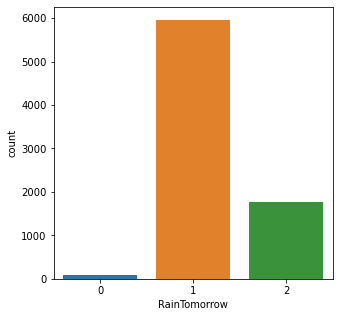

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['RainTomorrow'].value_counts())  
plt.figure(figsize=(5,5))
sns.countplot(df['RainTomorrow'])
plt.show()

We can see that it needs over sampling due to high variance in the outcome cell



# Modelling

Getting the best random state


In [103]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_2_train,x_2_test, y_2_train, y_2_test=train_test_split(x2,y2,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_2_train,y_2_train)
    pred=rfc.predict(x_2_test)
    acc=accuracy_score(y_2_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu*100," on Random_state ",maxRS)

Best accuracy is  90.04678860059549  on Random_state  60


# Saving the model


In [ ]:
import joblib
joblib.dump(Raine,"Global_Power_Plant_Fuel_Type.pkl")

In [ ]:
#completed